# DATA ANALYSIS FOR KEPLER

### 7/25/23

In [1]:
#import exoplanet as xo
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from astropy.time import Time

%config InlineBackend.figure_format = "retina"

import sys
#sys.path.append("../CandidateSurveys")
#import fit
#import data
import xo_archive
import data

In [ ]:
# from importlib import reload
# reload(xo_archive)

# Starting with list of targets

- need to remove the binary systems
- find eccentricity values
- find # of planets in system
- Determine if they have TTVs

In [9]:
true_kep= pd.read_csv('candidates_2_truesurvey.csv')
true_kep

,kepler_name,kepid,system
0,Kepler-680 b,12110942,Kepler-680
1,Kepler-105 c,9579641,Kepler-105
2,Kepler-52 c,11754553,Kepler-52
3,Kepler-52 d,11754553,Kepler-52
4,Kepler-674 b,11853255,Kepler-674
...,...,...,...
290,Kepler-1899 b,2715695,Kepler-1899
291,Kepler-1631 b,8037038,Kepler-1631
292,Kepler-1643 b,8653134,Kepler-1643
293,Kepler-1534 b,8030339,Kepler-1534


# Finding TTV and non TTV planets

In [27]:
nottv_truekep= []
ttv_truekep= []
for can in true_kep['system']:
    results_nottv= len(xo_archive.get_exoplanet_parameters(search_name=can, custom_cond="ttv_flag=0", columns=["pl_name", "pl_letter"]))
    nottv_truekep.append(results_nottv)
    results_ttv= len(xo_archive.get_exoplanet_parameters(search_name=can, custom_cond="ttv_flag=1", columns=["pl_name", "pl_letter"]))
    ttv_truekep.append(results_ttv)

# Adding circumbinary flag: "cb_flag"

In [17]:
# circumbinary flag
binary_flag= []
# 1=yes, 0=no
for can in true_kep['system']:
    # checking for binary systems
    results_bin= xo_archive.get_exoplanet_parameters(search_name=can, columns=["pl_name", "pl_letter", "cb_flag"])
    binary_flag.append(results_bin)
binary_flag[0]

[{'pl_name': 'Kepler-680 b', 'pl_letter': 'b', 'cb_flag': 0}]

# Adding regular binary system flag: "sy_snum" (gives # of stars)

In [64]:
# this is for the binary star regular system
real_binary_flag= []
# 1=yes, 0=no
for can in true_kep['system']:
    # checking for binary systems
    results_bin= xo_archive.get_exoplanet_parameters(search_name=can, columns=["pl_name", "pl_letter", "sy_snum"])
    real_binary_flag.append(results_bin)
real_binary_flag[0]

[{'pl_name': 'Kepler-680 b', 'pl_letter': 'b', 'sy_snum': 1}]

### Sorting the binary flags to add to final dataframe

In [67]:
regbinary_true_kep=[]
for value in real_binary_flag:
    test= str(value).split(':')[-1]
    regbinary_true_kep.append(test)

In [325]:
regbinary_true_kep[0]

' 1}]'

In [327]:
regbinary_true_kep_1=[]
for value in regbinary_true_kep:
    bin_flag_1= value.split('}')[0].split(' ')[-1]
    regbinary_true_kep_1.append(bin_flag_1)     

In [328]:
regbinary_true_kep_1[0]

'1'

In [37]:
binary_true_kep=[]
for value in binary_flag:
    test= str(value).split(':')[-1]
    binary_true_kep.append(test)

In [329]:
bin_kep_flags=[]
for value in binary_true_kep:
    bin_flag_1= value.split('}')[0].split(' ')[-1]
    bin_kep_flags.append(bin_flag_1)    

In [330]:
bin_kep_flags[0]

'0'

In [35]:
lists = ttv_truekep, nottv_truekep
size_sys= [sum(x) for x in zip(*lists)]

# converting all string values to integers for slicing the final data frame
- this can definitely be condensed but I just did them as I went...

In [134]:
ttv_truekep_1=[]
for value in ttv_truekep:
    new= int(value)
    ttv_truekep_1.append(new)

In [135]:
nottv_truekep_1=[]
for value in nottv_truekep:
    new= int(value)
    nottv_truekep_1.append(new)

In [136]:
size_sys_1=[]
for value in size_sys:
    new= int(value)
    size_sys_1.append(new)

In [224]:
regbinary_true_kep_2=[]
for value in regbinary_true_kep_1:
    new= int(value)
    regbinary_true_kep_2.append(new)

In [137]:
bin_kep_flags_1=[]
for value in bin_kep_flags:
    new= int(value)
    bin_kep_flags_1.append(new)

In [ ]:
ttv_int_vals=[]
nottv_int_vals=[]
for value in bin_kep_flags:
    new= int(value)
    bin_kep_flags_1.append(new)

## finding eccentricities

In [179]:
ecc= []
for can in true_kep['system']:
    results_ecc= xo_archive.get_exoplanet_parameters(search_name=can, columns=["pl_name", "pl_letter", "pl_orbeccen"])
    ecc.append(results_ecc)
len(ecc[1])

2

### Creates a list of lists of values with parameters for each planet in each system

In [180]:
i_vals= np.arange(0,len(ecc),1)
e_values=[]
for i in i_vals:
    length_temp_vals= np.arange(0,len(ecc[i]),1)
    e_temp= []
    for val in length_temp_vals:
        orb_e= ecc[i][val]
        e_temp.append(orb_e)
    e_values.append(e_temp)

In [321]:
e_values[0]

[{'pl_name': 'Kepler-680 b', 'pl_letter': 'b', 'pl_orbeccen': None}]

# This line gives the true eccentricities in the data frame of each planet in the system!

### In the form of a list of lists

In [216]:
e_extract=[]
for index in i_vals:
    length_temp_vals= np.arange(0,len(e_values[index]),1)
    list_of_e=[]
    for length in length_temp_vals:
        eccentricity= e_values[index][length]['pl_orbeccen']
        list_of_e.append(eccentricity)
    e_extract.append(list_of_e)

In [324]:
e_extract[1]

[0.47, None]

## Adding all the *integer* values to the final data frame as columns

In [236]:
true_kep['# TTV']= ttv_truekep_1
true_kep['# non TTV']= nottv_truekep_1
true_kep['size_sys']= size_sys_1
true_kep['circumbinary_flag']= bin_kep_flags_1
true_kep['# stars']= regbinary_true_kep_2
true_kep['eccentricity']= e_extract
#true_kep.to_csv('Complete_Kepler_Survey_7_25.csv')

In [260]:
index_ecc=[] # This gives all of the high eccentricity index systems
value_ecc=[]
for index, row in true_kep.iterrows():
    for value in row['eccentricity']:
        if value != None and value >0.1:
            #print(value, index)
            index_ecc.append(index)
            value_ecc.append(value)

In [277]:
mask_ecc= true_kep.index.isin(index_ecc)
true_kep['eccentric?']= mask_ecc
len(true_kep[true_kep['eccentric?']==True])

9

In [278]:
true_kep

,kepler_name,kepid,system,# TTV,# non TTV,size_sys,circumbinary_flag,# stars,eccentricity,eccentric?
0,Kepler-680 b,12110942,Kepler-680,0,1,1,0,1,[None],False
1,Kepler-105 c,9579641,Kepler-105,1,1,2,0,1,"[0.47, None]",True
2,Kepler-52 c,11754553,Kepler-52,3,0,3,0,1,"[None, None, None]",False
3,Kepler-52 d,11754553,Kepler-52,3,0,3,0,1,"[None, None, None]",False
4,Kepler-674 b,11853255,Kepler-674,0,1,1,0,1,[None],False
...,...,...,...,...,...,...,...,...,...,...
290,Kepler-1899 b,2715695,Kepler-1899,0,1,1,0,1,[None],False
291,Kepler-1631 b,8037038,Kepler-1631,0,1,1,0,1,[None],False
292,Kepler-1643 b,8653134,Kepler-1643,0,1,1,0,1,[None],False
293,Kepler-1534 b,8030339,Kepler-1534,0,1,1,0,1,[None],False


# Save it here

In [279]:
true_kep.to_csv('Full_Data_Kepler_Survey_RECENT.csv')

# Applying Data Sliices

In [284]:
# Cut out all systems with TTVs
sliced= true_kep[true_kep['# TTV']==0]
# Reduces it to single star planetary systems
sliced= sliced[sliced['# stars']==1]
#There are no circumbinary systems so we don't have to slice for those...
# Reduced to non eccentric systems
sliced= sliced[sliced['eccentric?']==False]
sliced.to_csv('Kepler_Reduced_AllSystems.csv')

In [289]:
sliced_multi= sliced[sliced['size_sys']>1]
sliced_multi.to_csv('Kepler_Reduced_MultiPlanet.csv')

In [247]:
true_kep

,kepler_name,kepid,system,# TTV,# non TTV,size_sys,circumbinary_flag,# stars,eccentricity
0,Kepler-680 b,12110942,Kepler-680,0,1,1,0,1,[None]
1,Kepler-105 c,9579641,Kepler-105,1,1,2,0,1,"[0.47, None]"
2,Kepler-52 c,11754553,Kepler-52,3,0,3,0,1,"[None, None, None]"
3,Kepler-52 d,11754553,Kepler-52,3,0,3,0,1,"[None, None, None]"
4,Kepler-674 b,11853255,Kepler-674,0,1,1,0,1,[None]
...,...,...,...,...,...,...,...,...,...
290,Kepler-1899 b,2715695,Kepler-1899,0,1,1,0,1,[None]
291,Kepler-1631 b,8037038,Kepler-1631,0,1,1,0,1,[None]
292,Kepler-1643 b,8653134,Kepler-1643,0,1,1,0,1,[None]
293,Kepler-1534 b,8030339,Kepler-1534,0,1,1,0,1,[None]


# Our target candidates for the Kepler Survey!

## Plot with sequential slices (this is the old less good version)

Text(0, 0.5, 'Occurence')

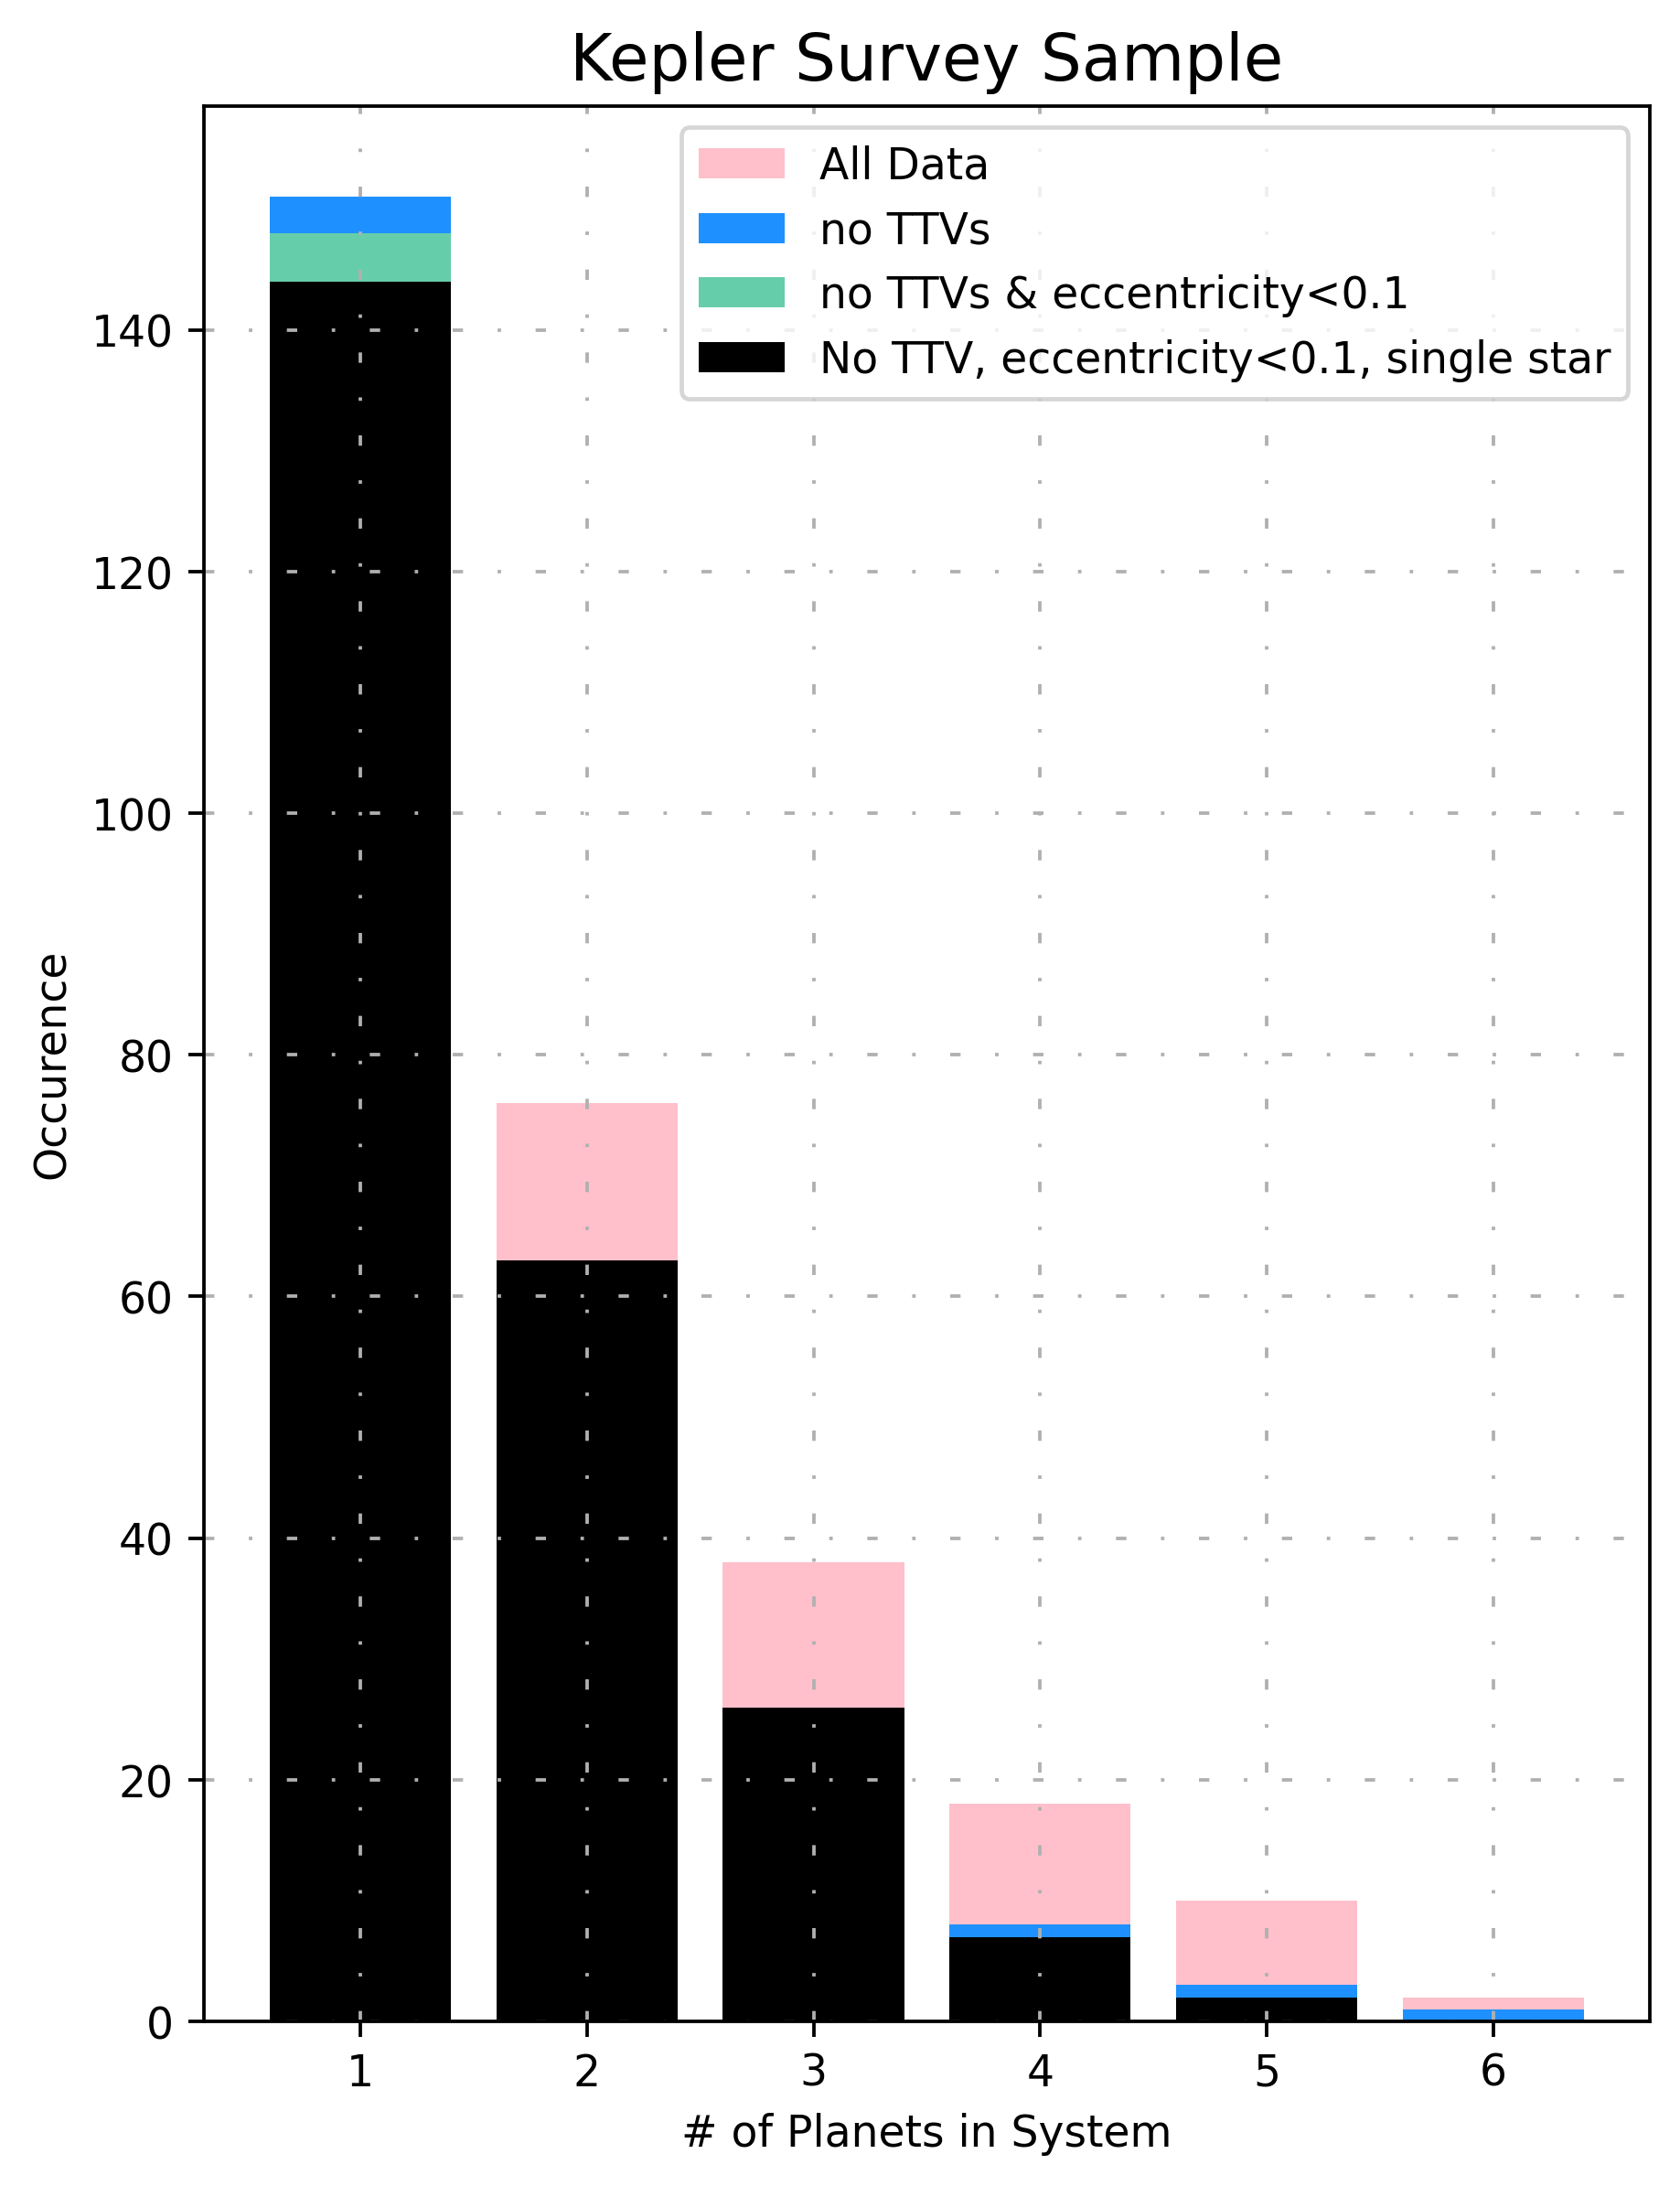

In [318]:
import matplotlib.pyplot as plt

# Data
sys_size = ['1', '2', '3', '4', '5', '6']
# full survey
all_vals=[]
#all except TTV
no_ttvs=[]
#exclude ecc + TTV
no_eccs=[]
# exclude ecc + TTV+ binary
no_bins=[]
for value in np.arange(1,7,1):
    all_val= len(true_kep[true_kep['size_sys']==value])
    all_vals.append(all_val)
    no_ttv_data= true_kep[true_kep['# TTV']==0]
    no_ttv= len(no_ttv_data[no_ttv_data['size_sys']==value])
    no_ttvs.append(no_ttv)
    no_ecc_data= no_ttv_data[no_ttv_data['eccentric?']==False]
    no_ecc= len(no_ecc_data[no_ecc_data['size_sys']==value])
    no_eccs.append(no_ecc)
    no_bin_data= no_ecc_data[no_ecc_data['# stars']==1]
    no_bin= len(no_bin_data[no_bin_data['size_sys']==value])
    no_bins.append(no_bin)
    

fig, ax = plt.subplots(figsize=(6,8), dpi=170)

# Stacked bar chart
ax.bar(sys_size, all_vals,label='All Data', color='pink')
ax.grid(linestyle=((0, (3, 10, 1, 10))))
ax.bar(sys_size, no_ttvs, label='no TTVs', color='dodgerblue')
ax.bar(sys_size, no_eccs, label='no TTVs & eccentricity<0.1', color='mediumaquamarine')
ax.bar(sys_size, no_bins, label='No TTV, eccentricity<0.1, single star', color='black')
#ax.bar(sys_size, no_eccs, bottom = no_eccs, label='no TTV or ecc', color='green')
ax.legend()
ax.set_title('Kepler Survey Sample', size=15)
ax.set_xlabel('# of Planets in System')
ax.set_ylabel('Occurence')
#plt.savefig('KeplerSurvey.png');

## Other Plot variation:
### Include the full amount of data for each stacked above the all data section to see how large each portion is

# Preffered Variation below (less data is lost in the plotting process and you get a better idea of where the slices occur)

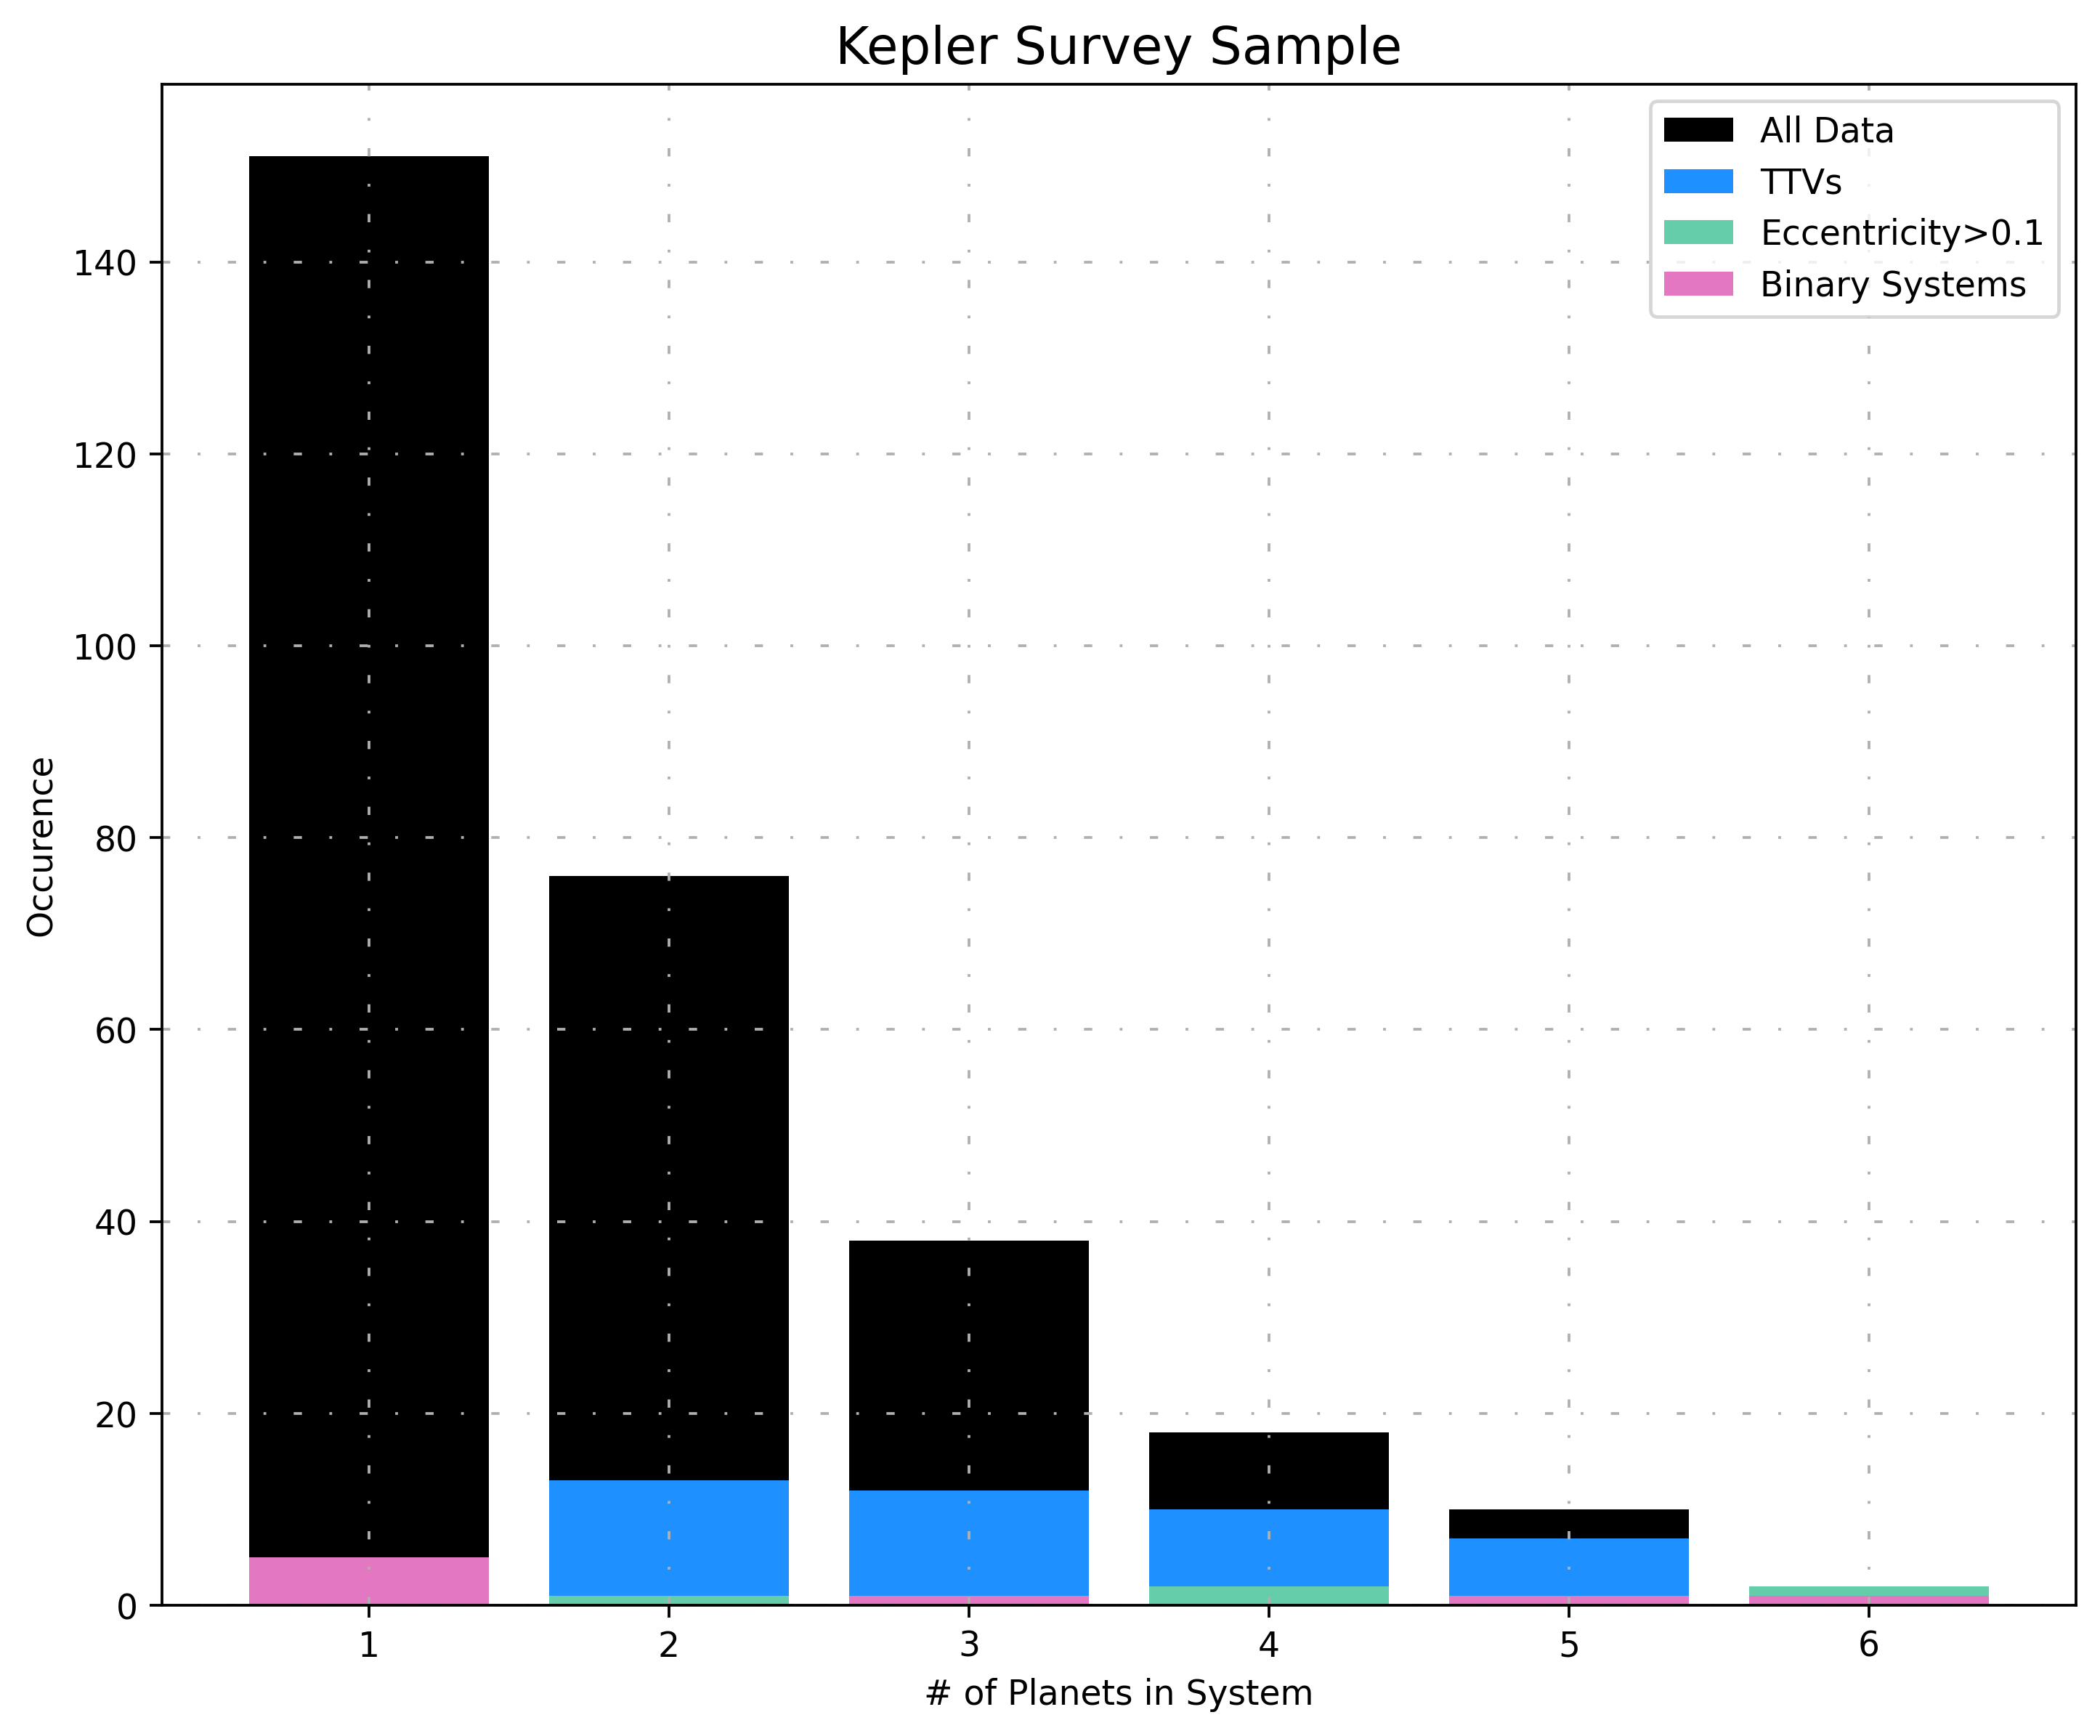

In [320]:
import matplotlib.pyplot as plt

# Data
sys_size = ['1', '2', '3', '4', '5', '6']
# full survey
all_vals=[]
#all except TTV
ttvs=[]
#exclude ecc + TTV
eccs=[]
# exclude ecc + TTV+ binary
bins=[]
for value in np.arange(1,7,1):
    all_val= len(true_kep[true_kep['size_sys']==value])
    all_vals.append(all_val)
    ttv_data= true_kep[true_kep['# TTV']>0]
    ttv= len(ttv_data[ttv_data['size_sys']==value])
    ttvs.append(ttv)
    ecc_data= true_kep[true_kep['eccentric?']==True]
    ecc= len(ecc_data[ecc_data['size_sys']==value])
    eccs.append(ecc)
    bin_data= true_kep[true_kep['# stars']>1]
    bin_1= len(bin_data[bin_data['size_sys']==value])
    bins.append(bin_1)
    

fig, ax = plt.subplots(figsize=(10,8), dpi=170)

# Stacked bar chart
ax.bar(sys_size, all_vals,label='All Data', color='black')
ax.grid(linestyle=((0, (3, 10, 1, 10))))
ax.bar(sys_size, ttvs, label='TTVs', color='dodgerblue')
ax.bar(sys_size, eccs, label='Eccentricity>0.1', color='mediumaquamarine')
ax.bar(sys_size, bins, label='Binary Systems', color='tab:pink')
#ax.bar(sys_size, no_eccs, bottom = no_eccs, label='no TTV or ecc', color='green')
ax.legend()
ax.set_title('Kepler Survey Sample', size=15)
ax.set_xlabel('# of Planets in System')
ax.set_ylabel('Occurence')
plt.savefig('KeplerSurvey_NEW.png');